# ECE C147/247 HW4 Q1: Optimization for Fully Connected Networks

In this notebook, we will implement different optimization rules for gradient descent.  We have provided starter code; however, you will need to copy and paste your code from your implementation of the modular fully connected nets in HW #3 to build upon this.

`utils` has built a solid API for building these modular frameworks and training them, and we will use their very well implemented framework as opposed to "reinventing the wheel."  This includes using their Solver, various utility functions, and their layer structure.  This also includes `nndl.fc_net`, `nndl.layers`, and `nndl.layer_utils`.

In [1]:
## Import and setups

import time
import numpy as np
import matplotlib.pyplot as plt
from nndl.fc_net import *
from utils.data_utils import get_CIFAR10_data
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k in data.keys():
  print('{}: {} '.format(k, data[k].shape))

X_train: (49000, 3, 32, 32) 
y_train: (49000,) 
X_val: (1000, 3, 32, 32) 
y_val: (1000,) 
X_test: (1000, 3, 32, 32) 
y_test: (1000,) 


## Building upon your HW #3 implementation

Copy and paste the following functions from your HW #3 implementation of a modular FC net:

- `affine_forward` in `nndl/layers.py`
- `affine_backward` in `nndl/layers.py`
- `relu_forward` in `nndl/layers.py`
- `relu_backward` in `nndl/layers.py`
- `affine_relu_forward` in ``nndl/layer_utils.py``
- `affine_relu_backward` in ``nndl/layer_utils.py``
- The `FullyConnectedNet` class in `nndl/fc_net.py`

### Test all functions you copy and pasted

In [4]:
from nndl.layer_tests import *

affine_forward_test(); print('\n')
affine_backward_test(); print('\n')
relu_forward_test(); print('\n')
relu_backward_test(); print('\n')
affine_relu_test(); print('\n')
fc_net_test()

If affine_forward function is working, difference should be less than 1e-9:
difference: 9.7698500479884e-10


If affine_backward is working, error should be less than 1e-9::
dx error: 2.024696100359672e-09
dw error: 4.1275564409242133e-10
db error: 5.1272510419743276e-12


If relu_forward function is working, difference should be around 1e-8:
difference: 4.999999798022158e-08


If relu_forward function is working, error should be less than 1e-9:
dx error: 3.275609924020855e-12


If affine_relu_forward and affine_relu_backward are working, error should be less than 1e-9::
dx error: 4.193242049578614e-10
dw error: 1.1689170621578504e-09
db error: 3.5259804817210733e-12


Running check with reg = 0
Initial loss: 0.0
Running check with reg = 3.14
Initial loss: 0.0


# Training a larger model

In general, proceeding with vanilla stochastic gradient descent to optimize models may be fraught with problems and limitations, as discussed in class.  Thus, we implement optimizers that improve on SGD.

## SGD + momentum

In the following section, implement SGD with momentum.  Read the `nndl/optim.py` API, and be sure you understand it.  After, implement `sgd_momentum` in `nndl/optim.py`.  Test your implementation of `sgd_momentum` by running the cell below.

In [6]:
from nndl.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))

next_w error: 8.882347033505819e-09
velocity error: 4.269287743278663e-09


## SGD + Nesterov momentum
Implement `sgd_nesterov_momentum` in `ndl/optim.py`.

In [7]:
from nndl.optim import sgd_nesterov_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_nesterov_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [0.08714,      0.15246105,  0.21778211,  0.28310316,  0.34842421],
  [0.41374526,   0.47906632,  0.54438737,  0.60970842,  0.67502947],
  [0.74035053,   0.80567158,  0.87099263,  0.93631368,  1.00163474],
  [1.06695579,   1.13227684,  1.19759789,  1.26291895,  1.32824   ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579,  0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print('next_w error: {}'.format(rel_error(next_w, expected_next_w)))
print('velocity error: {}'.format(rel_error(expected_velocity, config['velocity'])))

next_w error: 1.0875186845081027e-08
velocity error: 4.269287743278663e-09


## Evaluating SGD, SGD+Momentum, and SGD+NesterovMomentum

Run the following cell to train a 6 layer FC net with SGD, SGD+momentum, and SGD+Nesterov momentum.  You should see that SGD+momentum achieves a better loss than SGD, and that SGD+Nesterov momentum achieves a slightly better loss (and training accuracy) than SGD+momentum.

Optimizing with sgd
Optimizing with sgd_momentum
Optimizing with sgd_nesterov_momentum


<ipython-input-13-52ffd8523dca>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 1)
<ipython-input-13-52ffd8523dca>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 2)
<ipython-input-13-52ffd8523dca>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

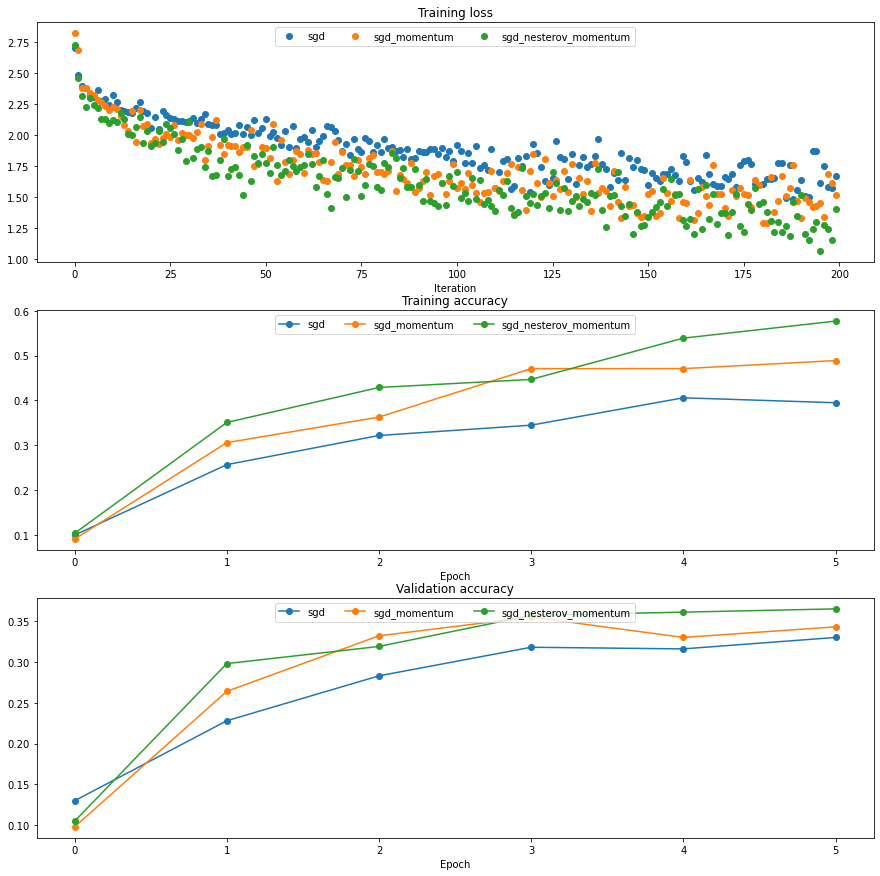

In [13]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum', 'sgd_nesterov_momentum']:
  print('Optimizing with {}'.format(update_rule))
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=False)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp

Now we go to techniques that adapt the gradient.  Implement `rmsprop` in `nndl/optim.py`.  Test your implementation by running the cell below.

In [14]:
from nndl.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
a = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'a': a}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print('next_w error: {}'.format(rel_error(expected_next_w, next_w)))
print('cache error: {}'.format(rel_error(expected_cache, config['a'])))

next_w error: 9.524687511038133e-08
cache error: 2.6477955807156126e-09


## Adaptive moments

Now, implement `adam` in `nndl/optim.py`.  Test your implementation by running the cell below.

In [15]:
# Test Adam implementation; you should see errors around 1e-7 or less
from nndl.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
a = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'v': v, 'a': a, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_a = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_v = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print('next_w error: {}'.format(rel_error(expected_next_w, next_w)))
print('a error: {}'.format(rel_error(expected_a, config['a'])))
print('v error: {}'.format(rel_error(expected_v, config['v'])))

next_w error: 1.1395691798535431e-07
a error: 4.208314038113071e-09
v error: 4.214963193114416e-09


## Comparing SGD, SGD+NesterovMomentum, RMSProp, and Adam

The following code will compare optimization with SGD, Momentum, Nesterov Momentum, RMSProp and Adam.  In our code, we find that RMSProp, Adam, and SGD + Nesterov Momentum achieve approximately the same training error after a few training epochs.

Optimizing with adam
Optimizing with rmsprop


<ipython-input-16-27795ef4623c>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 1)
<ipython-input-16-27795ef4623c>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 1, 2)
<ipython-input-16-27795ef4623c>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

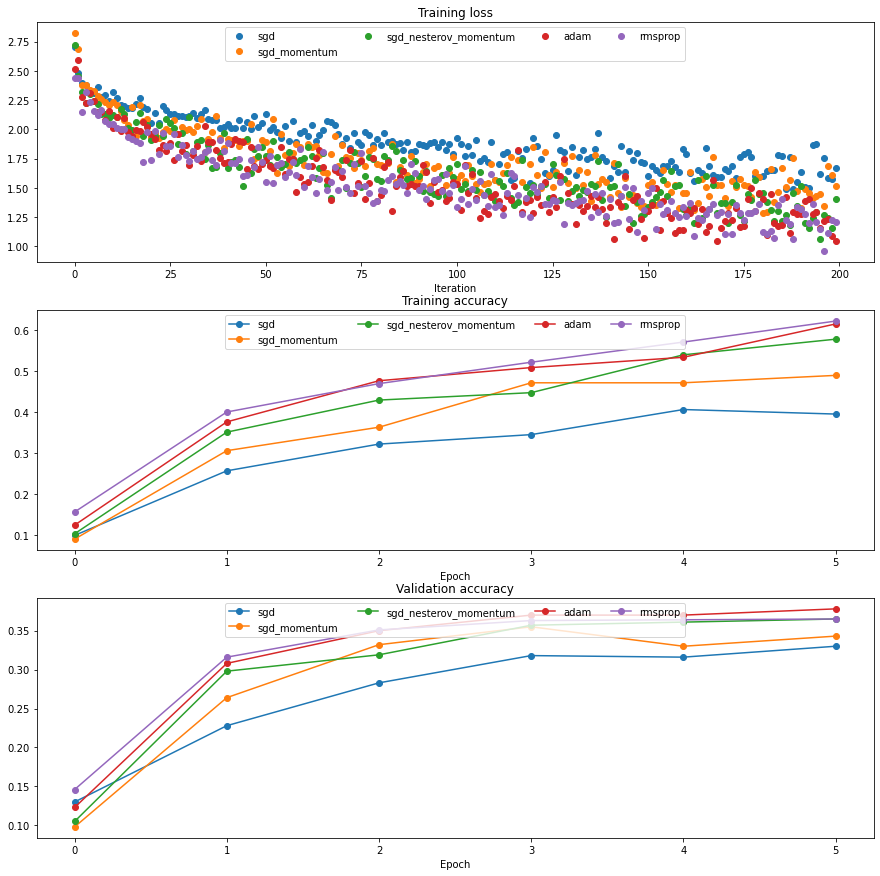

In [16]:
learning_rates = {'rmsprop': 2e-4, 'adam': 1e-3}

for update_rule in ['adam', 'rmsprop']:
  print('Optimizing with {}'.format(update_rule))
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=False)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Easier optimization

In the following cell, we'll train a 4 layer neural network having 500 units in each hidden layer with the different optimizers, and find that it is far easier to get up to 50+% performance on CIFAR-10.  After we implement batchnorm and dropout, we'll ask you to get 55+% on CIFAR-10.

In [18]:
optimizer = 'adam'
best_model = None

layer_dims = [500, 500, 500]
weight_scale = 0.01
learning_rate = 1e-3
lr_decay = 0.9

model = FullyConnectedNet(layer_dims, weight_scale=weight_scale,
                          use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=10, batch_size=100,
                update_rule=optimizer,
                optim_config={
                  'learning_rate': learning_rate,
                },
                lr_decay=lr_decay,
                verbose=True, print_every=50)
solver.train()

(Iteration 1 / 4900) loss: 2.315005
(Epoch 0 / 10) train acc: 0.220000; val_acc: 0.228000
(Iteration 51 / 4900) loss: 1.864788
(Iteration 101 / 4900) loss: 1.814898
(Iteration 151 / 4900) loss: 1.680357
(Iteration 201 / 4900) loss: 1.647855
(Iteration 251 / 4900) loss: 1.691966
(Iteration 301 / 4900) loss: 1.588605
(Iteration 351 / 4900) loss: 1.450832
(Iteration 401 / 4900) loss: 1.290359
(Iteration 451 / 4900) loss: 1.574712
(Epoch 1 / 10) train acc: 0.470000; val_acc: 0.469000
(Iteration 501 / 4900) loss: 1.247711
(Iteration 551 / 4900) loss: 1.323890
(Iteration 601 / 4900) loss: 1.375390
(Iteration 651 / 4900) loss: 1.478475
(Iteration 701 / 4900) loss: 1.488726
(Iteration 751 / 4900) loss: 1.323479
(Iteration 801 / 4900) loss: 1.281338
(Iteration 851 / 4900) loss: 1.297834
(Iteration 901 / 4900) loss: 1.372141
(Iteration 951 / 4900) loss: 1.130006
(Epoch 2 / 10) train acc: 0.532000; val_acc: 0.529000
(Iteration 1001 / 4900) loss: 1.347674
(Iteration 1051 / 4900) loss: 1.327676
(It

In [19]:
y_test_pred = np.argmax(model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print('Validation set accuracy: {}'.format(np.mean(y_val_pred == data['y_val'])))
print('Test set accuracy: {}'.format(np.mean(y_test_pred == data['y_test'])))

Validation set accuracy: 0.571
Test set accuracy: 0.586


In [20]:
import numpy as np


def affine_forward(x, w, b):
  """
  Computes the forward pass for an affine (fully-connected) layer.

  The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
  examples, where each example x[i] has shape (d_1, ..., d_k). We will
  reshape each input into a vector of dimension D = d_1 * ... * d_k, and
  then transform it to an output vector of dimension M.

  Inputs:
  - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
  - w: A numpy array of weights, of shape (D, M)
  - b: A numpy array of biases, of shape (M,)
  
  Returns a tuple of:
  - out: output, of shape (N, M)
  - cache: (x, w, b)
  """

  # ================================================================ #
  # YOUR CODE HERE:
  #   Calculate the output of the forward pass.  Notice the dimensions
  #   of w are D x M, which is the transpose of what we did in earlier 
  #   assignments.
  # ================================================================ #


  
  x_res = x.reshape((x.shape[0], w.shape[0])) # Shape of N * D
  out = x_res.dot(w) + b.reshape((1, b.shape[0])) # Shape of N * M


  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  cache = (x, w, b)
  return out, cache


def affine_backward(dout, cache):
  """
  Computes the backward pass for an affine layer.

  Inputs:
  - dout: Upstream derivative, of shape (N, M)
  - cache: Tuple of:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

  Returns a tuple of:
  - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
  - dw: Gradient with respect to w, of shape (D, M)
  - db: Gradient with respect to b, of shape (M,)
  """
  x, w, b = cache
  dx, dw, db = None, None, None

  # ================================================================ #
  # YOUR CODE HERE:
  #   Calculate the gradients for the backward pass.
  # Notice:  
  #   dout is N x M
  #   dx should be N x d1 x ... x dk; it relates to dout through multiplication with w, which is D x M
  #   dw should be D x M; it relates to dout through multiplication with x, which is N x D after reshaping
  #   db should be M; it is just the sum over dout examples
  # ================================================================ #

    
  x_res = np.reshape(x, (x.shape[0], w.shape[0]))
  dx_res = dout.dot(w.T)
  dx = np.reshape(dx_res, x.shape) # Shape of N * D
  dw = x_res.T.dot(dout) # Shape of D * M
  db = dout.T.dot(np.ones(x.shape[0]))  # Shape of M * 1


  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
  
  return dx, dw, db

def relu_forward(x):
  """
  Computes the forward pass for a layer of rectified linear units (ReLUs).

  Input:
  - x: Inputs, of any shape

  Returns a tuple of:
  - out: Output, of the same shape as x
  - cache: x
  """
  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the ReLU forward pass.
  # ================================================================ #
  
  out = np.maximum(0, x)

  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
 
  cache = x
  return out, cache


def relu_backward(dout, cache):
  """
  Computes the backward pass for a layer of rectified linear units (ReLUs).

  Input:
  - dout: Upstream derivatives, of any shape
  - cache: Input x, of same shape as dout

  Returns:
  - dx: Gradient with respect to x
  """
  x = cache

  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the ReLU backward pass
  # ================================================================ #

  dx = (x > 0) * (dout)


  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
 
  return dx

def batchnorm_forward(x, gamma, beta, bn_param):
  """
  Forward pass for batch normalization.
  
  During training the sample mean and (uncorrected) sample variance are
  computed from minibatch statistics and used to normalize the incoming data.
  During training we also keep an exponentially decaying running mean of the mean
  and variance of each feature, and these averages are used to normalize data
  at test-time.

  At each timestep we update the running averages for mean and variance using
  an exponential decay based on the momentum parameter:

  running_mean = momentum * running_mean + (1 - momentum) * sample_mean
  running_var = momentum * running_var + (1 - momentum) * sample_var

  Note that the batch normalization paper suggests a different test-time
  behavior: they compute sample mean and variance for each feature using a
  large number of training images rather than using a running average. For
  this implementation we have chosen to use running averages instead since
  they do not require an additional estimation step; the torch7 implementation
  of batch normalization also uses running averages.

  Input:
  - x: Data of shape (N, D)
  - gamma: Scale parameter of shape (D,)
  - beta: Shift paremeter of shape (D,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features

  Returns a tuple of:
  - out: of shape (N, D)
  - cache: A tuple of values needed in the backward pass
  """
  mode = bn_param['mode']
  eps = bn_param.get('eps', 1e-5)
  momentum = bn_param.get('momentum', 0.9)

  N, D = x.shape
  running_mean = bn_param.get('running_mean', np.zeros(D, dtype=x.dtype))
  running_var = bn_param.get('running_var', np.zeros(D, dtype=x.dtype))

  out, cache = None, None
  if mode == 'train':
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   A few steps here:
    #     (1) Calculate the running mean and variance of the minibatch.
    #     (2) Normalize the activations with the running mean and variance.
    #     (3) Scale and shift the normalized activations.  Store this
    #         as the variable 'out'
    #     (4) Store any variables you may need for the backward pass in
    #         the 'cache' variable.
    # ================================================================ #

   mean_minibatch = np.mean(x, axis=0)
   var_minibatch  = np.var(x, axis=0)
   x_normalize = (x - mean_minibatch) / np.sqrt(var_minibatch + eps)
   out = gamma * x_normalize + beta
   
   mean_running = running_mean 
   var_running  = running_var  

   mean_running = momentum * mean_running + (1 - momentum) * mean_minibatch
   var_running  = momentum * var_running + (1 - momentum) * var_minibatch
   bn_param['running_mean'] = mean_running
   bn_param['running_var'] = var_running

   cache = {
      'minibatch_var': var_minibatch,
      'x_centralize': (x - mean_minibatch),
      'x_normalize': x_normalize,
      'gamma': gamma,
      'eps': eps
    }


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
  
  elif mode == 'test':
        
        

        
    # ================================================================ #
    # YOUR CODE HERE:
    #   Calculate the testing time normalized activation.  Normalize using
    #   the running mean and variance, and then scale and shift appropriately.
    #   Store the output as 'out'.
    # ================================================================ #
    out = gamma * (x - running_mean) / np.sqrt(running_var + eps) + beta
    
 
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
  else:
    raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

  # Store the updated running means back into bn_param
  bn_param['running_mean'] = running_mean
  bn_param['running_var'] = running_var

  return out, cache

def batchnorm_backward(dout, cache):
  """
  Backward pass for batch normalization.
  
  For this implementation, you should write out a computation graph for
  batch normalization on paper and propagate gradients backward through
  intermediate nodes.
  
  Inputs:
  - dout: Upstream derivatives, of shape (N, D)
  - cache: Variable of intermediates from batchnorm_forward.
  
  Returns a tuple of:
  - dx: Gradient with respect to inputs x, of shape (N, D)
  - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
  - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
  """
  dx, dgamma, dbeta = None, None, None

  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the batchnorm backward pass, calculating dx, dgamma, and dbeta.
  # ================================================================ #
    
  N = dout.shape[0]
  minibatch_var = cache.get('minibatch_var')
  x_centralize = cache.get('x_centralize')
  x_normalize = cache.get('x_normalize')
  gamma = cache.get('gamma')
  eps = cache.get('eps')
  
  # calculate dx
  dxhat = dout * gamma
  dxmu1 = dxhat / np.sqrt(minibatch_var + eps)
  sqrt_var = np.sqrt(minibatch_var + eps)
  dsqrt_var = -np.sum(dxhat * x_centralize, axis=0) / (sqrt_var**2)
  dvar = dsqrt_var * 0.5 / sqrt_var
  dxmu2 = 2 * x_centralize * dvar * np.ones_like(dout) / N
  dx1 = dxmu1 + dxmu2
  dx2 = -np.sum(dx1, axis=0) * np.ones_like(dout) / N
  dx = dx1 + dx2
  
  # calculate dbeta and dgamma
  dbeta = np.sum(dout, axis=0)
  dgamma = np.sum(dout * x_normalize, axis=0)
  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
  
  return dx, dgamma, dbeta

def dropout_forward(x, dropout_param):
  """
  Performs the forward pass for (inverted) dropout.

  Inputs:
  - x: Input data, of any shape
  - dropout_param: A dictionary with the following keys:
    - p: Dropout parameter. We drop each neuron output with probability p.
    - mode: 'test' or 'train'. If the mode is train, then perform dropout;
      if the mode is test, then just return the input.
    - seed: Seed for the random number generator. Passing seed makes this
      function deterministic, which is needed for gradient checking but not in
      real networks.

  Outputs:
  - out: Array of the same shape as x.
  - cache: A tuple (dropout_param, mask). In training mode, mask is the dropout
    mask that was used to multiply the input; in test mode, mask is None.
  """
  p, mode = dropout_param['p'], dropout_param['mode']
  if 'seed' in dropout_param:
    np.random.seed(dropout_param['seed'])

  mask = None
  out = None

  if mode == 'train':
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the inverted dropout forward pass during training time.  
    #   Store the masked and scaled activations in out, and store the 
    #   dropout mask as the variable mask.
    # ================================================================ #

    mask = (np.random.random_sample(x.shape) >= p) / (1 - p)
    out = x * mask
    
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
  elif mode == 'test':
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the inverted dropout forward pass during test time.
    # ================================================================ #

    out = x 

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

  cache = (dropout_param, mask)
  out = out.astype(x.dtype, copy=False)

  return out, cache

def dropout_backward(dout, cache):
  """
  Perform the backward pass for (inverted) dropout.

  Inputs:
  - dout: Upstream derivatives, of any shape
  - cache: (dropout_param, mask) from dropout_forward.
  """
  dropout_param, mask = cache
  mode = dropout_param['mode']
  
  dx = None
  if mode == 'train':
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the inverted dropout backward pass during training time.
    # ================================================================ #

    dx = dout * mask

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
  elif mode == 'test':
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the inverted dropout backward pass during test time.
    # ================================================================ #

    dx = dout

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
  return dx

def svm_loss(x, y):
  """
  Computes the loss and gradient using for multiclass SVM classification.

  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """
  N = x.shape[0]
  correct_class_scores = x[np.arange(N), y]
  margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
  margins[np.arange(N), y] = 0
  loss = np.sum(margins) / N
  num_pos = np.sum(margins > 0, axis=1)
  dx = np.zeros_like(x)
  dx[margins > 0] = 1
  dx[np.arange(N), y] -= num_pos
  dx /= N
  return loss, dx


def softmax_loss(x, y):
  """
  Computes the loss and gradient for softmax classification.

  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """

  probs = np.exp(x - np.max(x, axis=1, keepdims=True))
  probs /= np.sum(probs, axis=1, keepdims=True)
  N = x.shape[0]
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N
  dx = probs.copy()
  dx[np.arange(N), y] -= 1
  dx /= N
  return loss, dx


In [ ]:
from .layers import *


def affine_relu_forward(x, w, b):
  """
  Convenience layer that performs an affine transform followed by a ReLU

  Inputs:
  - x: Input to the affine layer
  - w, b: Weights for the affine layer

  Returns a tuple of:
  - out: Output from the ReLU
  - cache: Object to give to the backward pass
  """
  a, fc_cache = affine_forward(x, w, b)
  out, relu_cache = relu_forward(a)
  cache = (fc_cache, relu_cache)
  return out, cache


def affine_relu_backward(dout, cache):
  """
  Backward pass for the affine-relu convenience layer
  """
  fc_cache, relu_cache = cache
  da = relu_backward(dout, relu_cache)
  dx, dw, db = affine_backward(da, fc_cache)
  return dx, dw, db


In [ ]:
import numpy as np
from .layers import *
from .layer_utils import *


class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network with ReLU nonlinearity and
  softmax loss that uses a modular layer design. We assume an input dimension
  of D, a hidden dimension of H, and perform classification over C classes.
  
  The architecure should be affine - relu - affine - softmax.

  Note that this class does not implement gradient descent; instead, it
  will interact with a separate Solver object that is responsible for running
  optimization.

  The learnable parameters of the model are stored in the dictionary
  self.params that maps parameter names to numpy arrays.
  """
  
  def __init__(self, input_dim=3*32*32, hidden_dims=100, num_classes=10,
               dropout=0, weight_scale=1e-3, reg=0.0):
    """
    Initialize a new network.

    Inputs:
    - input_dim: An integer giving the size of the input
    - hidden_dims: An integer giving the size of the hidden layer
    - num_classes: An integer giving the number of classes to classify
    - dropout: Scalar between 0 and 1 giving dropout strength.
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - reg: Scalar giving L2 regularization strength.
    """
    self.params = {}
    self.reg = reg
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   Initialize W1, W2, b1, and b2.  Store these as self.params['W1'], 
    #   self.params['W2'], self.params['b1'] and self.params['b2']. The
    #   biases are initialized to zero and the weights are initialized
    #   so that each parameter has mean 0 and standard deviation weight_scale.
    #   The dimensions of W1 should be (input_dim, hidden_dim) and the
    #   dimensions of W2 should be (hidden_dims, num_classes)
    # ================================================================ #
     
    W1_size = (input_dim, hidden_dims)
    W2_size = (hidden_dims,num_classes)
    
    self.params['W1'] = np.random.normal(loc=0.0,scale=weight_scale,size = W1_size)
    self.params['b1'] = np.zeros(hidden_dims)
    self.params['W2'] = np.random.normal(loc=0.0,scale=weight_scale,size = W2_size)
    self.params['b2'] = np.zeros(num_classes)
    
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

  def loss(self, X, y=None):
    """
    Compute loss and gradient for a minibatch of data.

    Inputs:
    - X: Array of input data of shape (N, d_1, ..., d_k)
    - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

    Returns:
    If y is None, then run a test-time forward pass of the model and return:
    - scores: Array of shape (N, C) giving classification scores, where
      scores[i, c] is the classification score for X[i] and class c.

    If y is not None, then run a training-time forward and backward pass and
    return a tuple of:
    - loss: Scalar value giving the loss
    - grads: Dictionary with the same keys as self.params, mapping parameter
      names to gradients of the loss with respect to those parameters.
    """  
    scores = None

    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the forward pass of the two-layer neural network. Store
    #   the class scores as the variable 'scores'.  Be sure to use the layers
    #   you prior implemented.
    # ================================================================ #    
    
    W1 = self.params['W1']
    b1 = self.params['b1']
    W2 = self.params['W2']
    b2 = self.params['b2']

    H, cache_h = affine_relu_forward(X, W1, b1)
    Z, cache_z = affine_forward(H, W2, b2)

    scores = Z

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # If y is None then we are in test mode so just return scores
    if y is None:
      return scores
    
    loss, grads = 0, {}
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the backward pass of the two-layer neural net.  Store
    #   the loss as the variable 'loss' and store the gradients in the 
    #   'grads' dictionary.  For the grads dictionary, grads['W1'] holds
    #   the gradient for W1, grads['b1'] holds the gradient for b1, etc.
    #   i.e., grads[k] holds the gradient for self.params[k].
    #
    #   Add L2 regularization, where there is an added cost 0.5*self.reg*W^2
    #   for each W.  Be sure to include the 0.5 multiplying factor to 
    #   match our implementation.
    #
    #   And be sure to use the layers you prior implemented.
    # ================================================================ #    
    
    loss, dz = softmax_loss(scores, y)
    loss += 0.5*self.reg*(np.sum(W1*W1) + np.sum(W2*W2))

    dh, dw2, db2 = affine_backward(dz, cache_z)
    dx, dw1, db1 = affine_relu_backward(dh, cache_h)

    grads['W1'] = dw1 + self.reg * W1
    grads['b1'] = db1
    grads['W2'] = dw2 + self.reg * W2
    grads['b2'] = db2

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    return loss, grads


class FullyConnectedNet(object):
  """
  A fully-connected neural network with an arbitrary number of hidden layers,
  ReLU nonlinearities, and a softmax loss function. This will also implement
  dropout and batch normalization as options. For a network with L layers,
  the architecture will be
  
  {affine - [batch norm] - relu - [dropout]} x (L - 1) - affine - softmax
  
  where batch normalization and dropout are optional, and the {...} block is
  repeated L - 1 times.
  
  Similar to the TwoLayerNet above, learnable parameters are stored in the
  self.params dictionary and will be learned using the Solver class.
  """

  def __init__(self, hidden_dims, input_dim=3*32*32, num_classes=10,
               dropout=0, use_batchnorm=False, reg=0.0,
               weight_scale=1e-2, dtype=np.float32, seed=None):
    """
    Initialize a new FullyConnectedNet.
    
    Inputs:
    - hidden_dims: A list of integers giving the size of each hidden layer.
    - input_dim: An integer giving the size of the input.
    - num_classes: An integer giving the number of classes to classify.
    - dropout: Scalar between 0 and 1 giving dropout strength. If dropout=0 then
      the network should not use dropout at all.
    - use_batchnorm: Whether or not the network should use batch normalization.
    - reg: Scalar giving L2 regularization strength.
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - dtype: A numpy datatype object; all computations will be performed using
      this datatype. float32 is faster but less accurate, so you should use
      float64 for numeric gradient checking.
    - seed: If not None, then pass this random seed to the dropout layers. This
      will make the dropout layers deteriminstic so we can gradient check the
      model.
    """
    self.use_batchnorm = use_batchnorm
    self.use_dropout = dropout > 0
    self.reg = reg
    self.num_layers = 1 + len(hidden_dims)
    self.dtype = dtype
    self.params = {}

    # ================================================================ #
    # YOUR CODE HERE:
    #   Initialize all parameters of the network in the self.params dictionary.
    #   The weights and biases of layer 1 are W1 and b1; and in general the 
    #   weights and biases of layer i are Wi and bi. The
    #   biases are initialized to zero and the weights are initialized
    #   so that each parameter has mean 0 and standard deviation weight_scale.
    #
    #   BATCHNORM: Initialize the gammas of each layer to 1 and the beta
    #   parameters to zero.  The gamma and beta parameters for layer 1 should
    #   be self.params['gamma1'] and self.params['beta1'].  For layer 2, they
    #   should be gamma2 and beta2, etc. Only use batchnorm if self.use_batchnorm 
    #   is true and DO NOT do batch normalize the output scores.
    # ================================================================ #
    
    cur_dim = input_dim
    for idx, hidden_dim in enumerate(hidden_dims):
      self.params['W' + str(idx + 1)] = np.random.randn(cur_dim, hidden_dim) * weight_scale
      self.params['b' + str(idx + 1)] = np.zeros(hidden_dim)
      
      if self.use_batchnorm:
        self.params['gamma' + str(idx + 1)] = np.ones(hidden_dim)
        self.params['beta' + str(idx + 1)] = np.zeros(hidden_dim)
          
      cur_dim = hidden_dim

    self.params['W' + str(self.num_layers)] = np.random.randn(cur_dim, num_classes) * weight_scale
    self.params['b' + str(self.num_layers)] = np.zeros(num_classes)

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # When using dropout we need to pass a dropout_param dictionary to each
    # dropout layer so that the layer knows the dropout probability and the mode
    # (train / test). You can pass the same dropout_param to each dropout layer.
    self.dropout_param = {}
    if self.use_dropout:
      self.dropout_param = {'mode': 'train', 'p': dropout}
      if seed is not None:
        self.dropout_param['seed'] = seed
    
    # With batch normalization we need to keep track of running means and
    # variances, so we need to pass a special bn_param object to each batch
    # normalization layer. You should pass self.bn_params[0] to the forward pass
    # of the first batch normalization layer, self.bn_params[1] to the forward
    # pass of the second batch normalization layer, etc.
    self.bn_params = []
    if self.use_batchnorm:
      self.bn_params = [{'mode': 'train'} for i in np.arange(self.num_layers - 1)]
    
    # Cast all parameters to the correct datatype
    for k, v in self.params.items():
      self.params[k] = v.astype(dtype)


  def loss(self, X, y=None):
    """
    Compute loss and gradient for the fully-connected net.

    Input / output: Same as TwoLayerNet above.
    """
    X = X.astype(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params and dropout param since they
    # behave differently during training and testing.
    if self.dropout_param is not None:
      self.dropout_param['mode'] = mode   
    if self.use_batchnorm:
      for bn_param in self.bn_params:
        bn_param[mode] = mode

    scores = None
    
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the forward pass of the FC net and store the output
    #   scores as the variable "scores".
    #
    #   BATCHNORM: If self.use_batchnorm is true, insert a bathnorm layer
    #   between the affine_forward and relu_forward layers.  You may
    #   also write an affine_batchnorm_relu() function in layer_utils.py.
    #
    #   DROPOUT: If dropout is non-zero, insert a dropout layer after
    #   every ReLU layer.
    # ================================================================ #
    
    fc_cache = {}
    relu_cache = {}
    batchnorm_cache = {}
    dropout_cache = {}

    # flatten image
    X = np.reshape(X, [X.shape[0], -1])  

    # go through all layers
    for i in range(self.num_layers - 1):
      # fc layer
      fc_out, fc_cache[str(i + 1)] = affine_forward(X, self.params['W' + str(i + 1)], self.params['b' + str(i + 1)])

      # batchnorm layer
      relu_input = fc_out
      if self.use_batchnorm:
        batchnorm_out, batchnorm_cache[str(i + 1)] = batchnorm_forward(fc_out, self.params['gamma' + str(i + 1)], self.params['beta' + str(i + 1)], self.bn_params[i])
        relu_input = batchnorm_out
      relu_out, relu_cache[str(i + 1)] = relu_forward(relu_input)

      # dropout layer
      if self.use_dropout:
        relu_out, dropout_cache[str(i + 1)] = dropout_forward(relu_out, self.dropout_param)

      # update X
      X = relu_out.copy()

    # output FC layer with no relu
    scores, final_cache = affine_forward(X, self.params['W' + str(self.num_layers)], self.params['b' + str(self.num_layers)])


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    # If test mode return early
    if mode == 'test':
      return scores

    loss, grads = 0.0, {}
    # ================================================================ #
    # YOUR CODE HERE:
    #   Implement the backwards pass of the FC net and store the gradients
    #   in the grads dict, so that grads[k] is the gradient of self.params[k]
    #   Be sure your L2 regularization includes a 0.5 factor.
    #
    #   BATCHNORM: Incorporate the backward pass of the batchnorm.
    #
    #   DROPOUT: Incorporate the backward pass of dropout.
    # ================================================================ #

    loss, dx = softmax_loss(scores, y)
    loss += 0.5 * self.reg * (np.sum(np.square(self.params['W' + str(self.num_layers)])))
    dx_back, dw_back, db_back = affine_backward(dx, final_cache)
    grads['W' + str(self.num_layers)] = dw_back + self.reg * self.params['W' + str(self.num_layers)]
    grads['b' + str(self.num_layers)] = db_back

    # go backward all layers and update weights, bias, gammas and betas
    for i in range(self.num_layers - 1, 0, -1):
      # dropout layer
      if self.use_dropout:
        dx_back = dropout_backward(dx_back, dropout_cache[str(i)])
      dx_relu = relu_backward(dx_back, relu_cache[str(i)])

      # batchnorm layer
      affine_backward_input = dx_relu
      if self.use_batchnorm:
        dx_bn, dgamma, dbeta = batchnorm_backward(dx_relu, batchnorm_cache[str(i)])
        grads['gamma' + str(i)] = dgamma
        grads['beta' + str(i)] = dbeta
        affine_backward_input = dx_bn
      dx_back, dw_back, db_back = affine_backward(affine_backward_input, fc_cache[str(i)])

      grads['W' + str(i)] = dw_back + self.reg * self.params['W' + str(i)]
      grads['b' + str(i)] = db_back
      loss += 0.5 * self.reg * (np.sum(np.square(self.params['W' + str(i)])))


    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    
    return loss, grads


In [ ]:
import numpy as np


"""
This file implements various first-order update rules that are commonly used for
training neural networks. Each update rule accepts current weights and the
gradient of the loss with respect to those weights and produces the next set of
weights. Each update rule has the same interface:

def update(w, dw, config=None):

Inputs:
  - w: A numpy array giving the current weights.
  - dw: A numpy array of the same shape as w giving the gradient of the
    loss with respect to w.
  - config: A dictionary containing hyperparameter values such as learning rate,
    momentum, etc. If the update rule requires caching values over many
    iterations, then config will also hold these cached values.

Returns:
  - next_w: The next point after the update.
  - config: The config dictionary to be passed to the next iteration of the
    update rule.

NOTE: For most update rules, the default learning rate will probably not perform
well; however the default values of the other hyperparameters should work well
for a variety of different problems.

For efficiency, update rules may perform in-place updates, mutating w and
setting next_w equal to w.
"""


def sgd(w, dw, config=None):
  """
  Performs vanilla stochastic gradient descent.

  config format:
  - learning_rate: Scalar learning rate.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)

  w -= config['learning_rate'] * dw
  return w, config


def sgd_momentum(w, dw, config=None):
  """
  Performs stochastic gradient descent with momentum.

  config format:
  - learning_rate: Scalar learning rate.
  - momentum: Scalar between 0 and 1 giving the momentum value.
    Setting momentum = 0 reduces to sgd.
  - velocity: A numpy array of the same shape as w and dw used to store a moving
    average of the gradients.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)
  config.setdefault('momentum', 0.9) # set momentum to 0.9 if it wasn't there
  v = config.get('velocity', np.zeros_like(w))	 # gets velocity, else sets it to zero.
 
  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the momentum update formula.  Return the updated weights
  #   as next_w, and the updated velocity as v.
  # ================================================================ #

  v = config['momentum'] * v - config['learning_rate'] * dw
  next_w = w + v

  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  config['velocity'] = v

  return next_w, config

def sgd_nesterov_momentum(w, dw, config=None):
  """
  Performs stochastic gradient descent with Nesterov momentum.

  config format:
  - learning_rate: Scalar learning rate.
  - momentum: Scalar between 0 and 1 giving the momentum value.
    Setting momentum = 0 reduces to sgd.
  - velocity: A numpy array of the same shape as w and dw used to store a moving
    average of the gradients.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)
  config.setdefault('momentum', 0.9) # set momentum to 0.9 if it wasn't there
  v = config.get('velocity', np.zeros_like(w))	 # gets velocity, else sets it to zero.
 
  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement the momentum update formula.  Return the updated weights
  #   as next_w, and the updated velocity as v.
  # ================================================================ #

  v_o = v
  v = config['momentum'] * v - config['learning_rate'] * dw
  w += v + config['momentum'] * (v - v_o)
  next_w = w


  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  config['velocity'] = v

  return next_w, config

def rmsprop(w, dw, config=None):
  """
  Uses the RMSProp update rule, which uses a moving average of squared gradient
  values to set adaptive per-parameter learning rates.

  config format:
  - learning_rate: Scalar learning rate.
  - decay_rate: Scalar between 0 and 1 giving the decay rate for the squared
    gradient cache.
  - epsilon: Small scalar used for smoothing to avoid dividing by zero.
  - beta: Moving average of second moments of gradients.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)
  config.setdefault('decay_rate', 0.99)
  config.setdefault('epsilon', 1e-8)
  config.setdefault('a', np.zeros_like(w))

  next_w = None

  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement RMSProp.  Store the next value of w as next_w.  You need
  #   to also store in config['a'] the moving average of the second
  #   moment gradients, so they can be used for future gradients. Concretely,
  #   config['a'] corresponds to "a" in the lecture notes.
  # ================================================================ #

  config['a'] = config['decay_rate']*config['a'] + (1-config['decay_rate'])*(dw**2)
  next_w = w - config['learning_rate']*dw/(np.sqrt(config['a'])+config['epsilon'])

  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  return next_w, config


def adam(w, dw, config=None):
  """
  Uses the Adam update rule, which incorporates moving averages of both the
  gradient and its square and a bias correction term.

  config format:
  - learning_rate: Scalar learning rate.
  - beta1: Decay rate for moving average of first moment of gradient.
  - beta2: Decay rate for moving average of second moment of gradient.
  - epsilon: Small scalar used for smoothing to avoid dividing by zero.
  - m: Moving average of gradient.
  - v: Moving average of squared gradient.
  - t: Iteration number.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-3)
  config.setdefault('beta1', 0.9)
  config.setdefault('beta2', 0.999)
  config.setdefault('epsilon', 1e-8)
  config.setdefault('v', np.zeros_like(w))
  config.setdefault('a', np.zeros_like(w))
  config.setdefault('t', 0)
  
  next_w = None

  # ================================================================ #
  # YOUR CODE HERE:
  #   Implement Adam.  Store the next value of w as next_w.  You need
  #   to also store in config['a'] the moving average of the second
  #   moment gradients, and in config['v'] the moving average of the
  #   first moments.  Finally, store in config['t'] the increasing time.
  # ================================================================ #

  beta1 = config['beta1']
  beta2 = config['beta2']
  t = config['t'] + 1

  v = beta1 * config['v'] + (1 - beta1) * dw
  a = beta2 * config['a'] + (1 - beta2) * (dw**2)
  v_corrected = v/(1 - beta1**t)
  a_corrected = a/(1 - beta2**t)
  next_w = w - config['learning_rate'] * v_corrected / (np.sqrt(a_corrected) + config['epsilon'])

  config['v'] = v
  config['a'] = a
  config['t'] = t
    
  # ================================================================ #
  # END YOUR CODE HERE
  # ================================================================ #
    
  return next_w, config